In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.feature_selection import mutual_info_classif

pd.plotting.register_matplotlib_converters()
%matplotlib inline


from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

%load_ext autoreload
%autoreload 2
from help_tool import help_tool, help_visuals, help_stats

pd.set_option('future.no_silent_downcasting', True)

# Setting graph parameters
sns.set_theme(style='whitegrid')
sns.set_palette('husl')

In [2]:
application_train = help_tool.csv_download(r'Archive\home-credit-default-risk\application_train.csv')
help_tool.first_look(application_train)

Dataset has 307511 observations and 122 features
Columns with all empty values []
Dataset has 0 duplicates


,dtypes,"Null values, Count","Null values, %"
SK_ID_CURR,int64,0,0.0
TARGET,int64,0,0.0
NAME_CONTRACT_TYPE,object,0,0.0
CODE_GENDER,object,0,0.0
FLAG_OWN_CAR,object,0,0.0
...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,float64,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,float64,41519,13.5


In [3]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
object_columns = application_train.select_dtypes(include=['object']).columns.tolist()
application_train[object_columns]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,Cash loans,M,N,N,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,Sales staff,THURSDAY,Services,reg oper account,block of flats,"Stone, brick",No
307507,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,NaN,MONDAY,XNA,reg oper account,block of flats,"Stone, brick",No
307508,Cash loans,F,N,Y,Unaccompanied,Working,Higher education,Separated,House / apartment,Managers,THURSDAY,School,reg oper account,block of flats,Panel,No
307509,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 1,NaN,block of flats,"Stone, brick",No


In [5]:
def convert_flags(df):
    for col in df.columns:
        if col.startswith('FLAG'):
            df[col] = df[col].replace({'Y': 1, 'N': 0}).astype(int)
            df[col] = df[col].infer_objects(copy=False)
    return df

application_train = convert_flags(application_train)

In [6]:
object_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

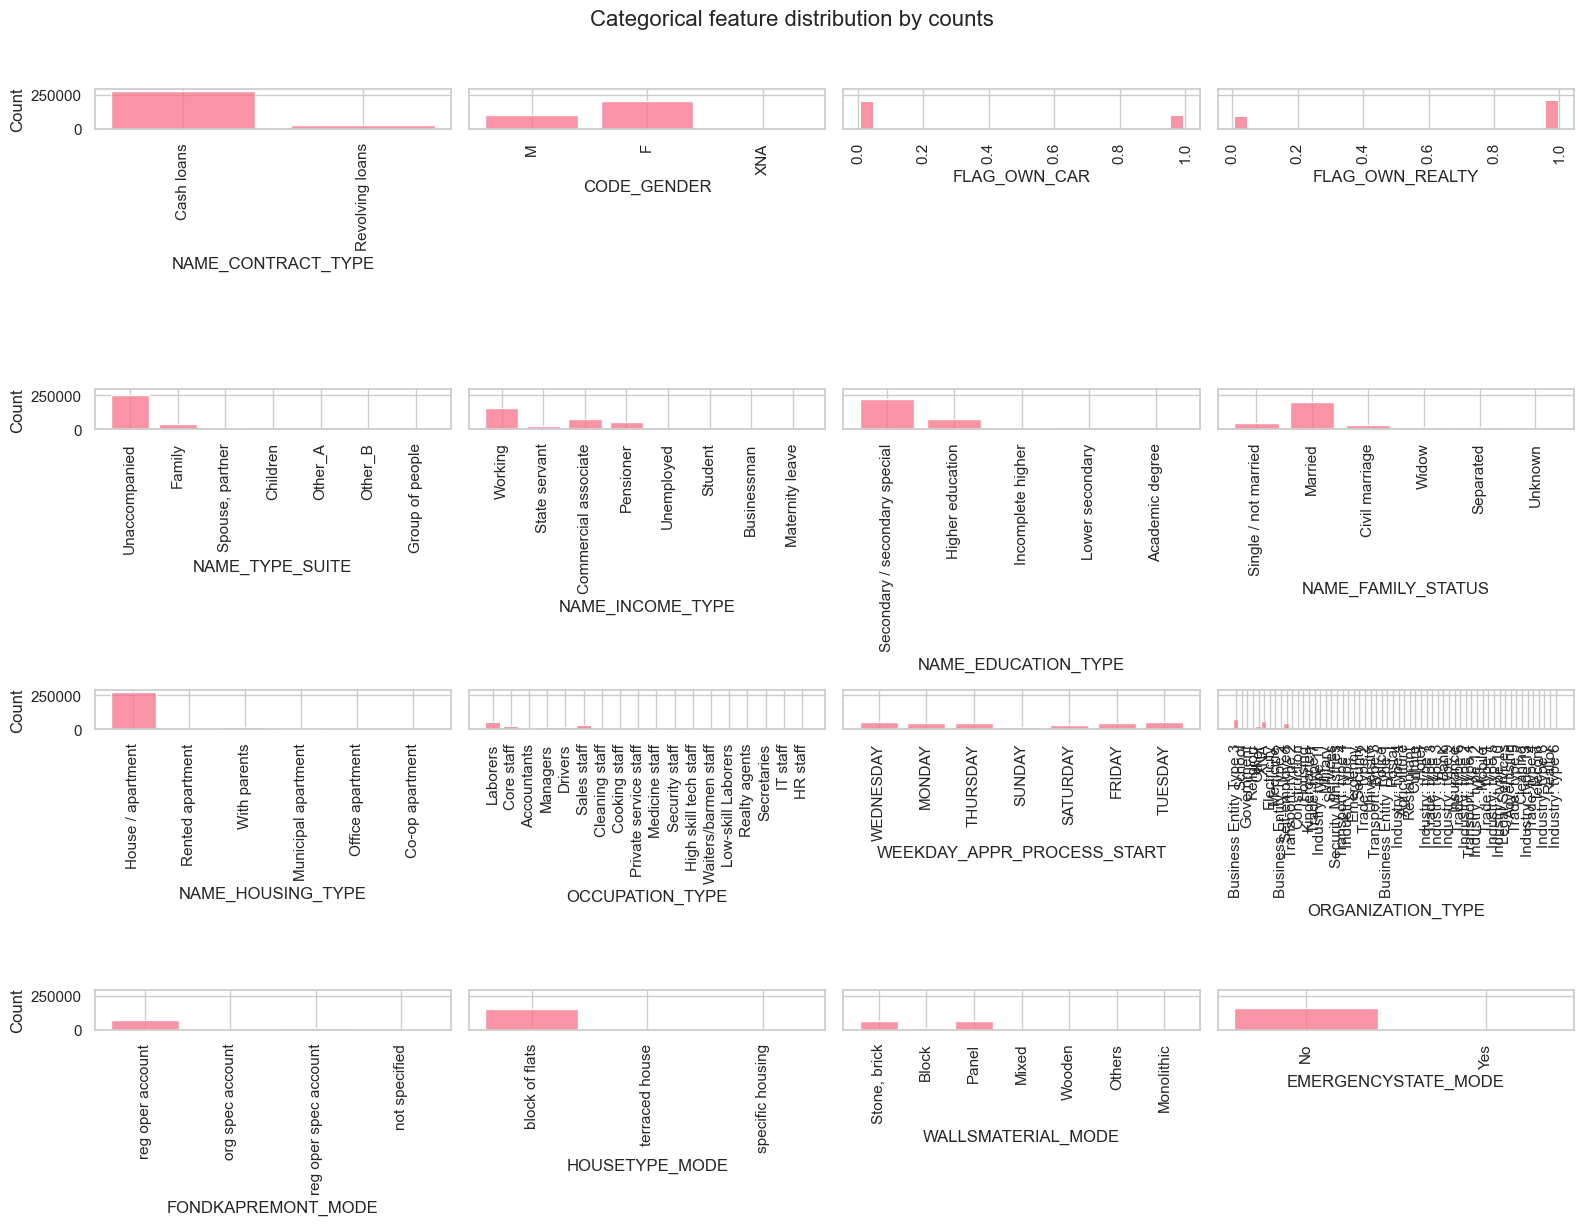

In [7]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12), sharey=True)

axes = axes.flatten()

for i, col in enumerate(object_columns):
    sns.histplot(data=application_train, x=col, bins=20, multiple="dodge", shrink=.8,
                 ax=axes[i], #hue='Target', 
                 legend=True)
    axes[i].tick_params(axis='x', rotation=90)

plt.suptitle(f"Categorical feature distribution by counts", size=16, y=1.02)
plt.tight_layout()
plt.show()

In [8]:
object_columns = application_train.select_dtypes(include=['object']).columns.tolist()

# df_dummies = pd.get_dummies(application_train[object_columns])
# df_dummies = df_dummies.astype(int)
# df_dummies.columns

In [9]:
application_train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [10]:
application_train['YEARS_BIRTH'] = round( - application_train['DAYS_BIRTH']/365, 1)
application_train.drop(columns='DAYS_BIRTH', inplace=True)

In [11]:
application_train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

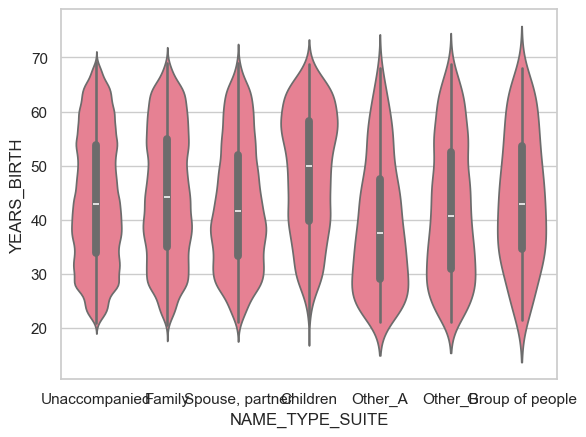

In [12]:
sns.violinplot(data=application_train, x='NAME_TYPE_SUITE', y='YEARS_BIRTH')
plt.show()

In [13]:
def encode_categories(df):
    """ Encoding various categories"""

    # Binary and/or unknown caterories
    df['CODE_GENDER_F'] = df['CODE_GENDER'].replace({'F': 1, 'M': 0, 'XNA': np.nan}).astype(float)
    df['NAME_CONTRACT_TYPE_CASH_LOANS'] = df['NAME_CONTRACT_TYPE'].replace({'Cash loans': 1, 'Revolving loans': 0}).astype(float)

    df.drop(columns=['CODE_GENDER', 'NAME_CONTRACT_TYPE'], inplace=True)   

    df['NAME_EDUCATION_TYPE'] = df['NAME_EDUCATION_TYPE'].replace({
        'Lower secondary': 1, 
        'Secondary / secondary special': 2,
        'Incomplete higher': 3,
        'Higher education': 4,
        'Academic degree': 5
        }).astype(int)
    
    df['NAME_TYPE_SUITE'] = np.where(df['NAME_TYPE_SUITE'] == 'Unaccompanied', 1, 0)


    # Weekdays to SIN
    df['WEEKDAY_APPR_PROCESS_START'] = df['WEEKDAY_APPR_PROCESS_START'].apply(help_tool.encode_weekday_sin)

    # Discrimination could be avoided be categorizing family status to single/not single
    df['NAME_FAMILY_STATUS'].replace({
            'Unknown': np.nan, 
            'Single / not married': 1, 
            'Separated': 1, 
            'Widow': 1, 
            'Married': 2,
            'Civil marriage': 2
        }, inplace=True)
    
    df['ORGANIZATION_TYPE'] = df['ORGANIZATION_TYPE'].replace({'XNA': np.nan})


    return df


application_train = encode_categories(application_train)

C:\Users\Gintare\AppData\Local\Temp\ipykernel_7440\1685544592.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_FAMILY_STATUS'].replace({


In [14]:
application_train.shape

(307511, 122)

# Flag columns

In [15]:
flag_doc_columns = application_train.filter(like='FLAG_DOCUMENT', axis=1).columns
application_train['FLAG_DOCUMENT'] = application_train[flag_doc_columns].sum(axis=1)

application_train['FLAG_DOCUMENT'].value_counts()

FLAG_DOCUMENT
1    270056
0     29549
2      7742
3       163
4         1
Name: count, dtype: int64

In [16]:
#application_train.drop(columns=['FLAG_DOCUMENT'], inplace=True)

In [17]:
visual_flag_doc = application_train.filter(like='FLAG_DOCUMENT', axis=1).replace(0, np.nan)

In [18]:
visual_flag_doc[visual_flag_doc['FLAG_DOCUMENT'] == 1].var()

FLAG_DOCUMENT_2     0.0
FLAG_DOCUMENT_3     0.0
FLAG_DOCUMENT_4     0.0
FLAG_DOCUMENT_5     0.0
FLAG_DOCUMENT_6     0.0
FLAG_DOCUMENT_7     0.0
FLAG_DOCUMENT_8     0.0
FLAG_DOCUMENT_9     0.0
FLAG_DOCUMENT_10    0.0
FLAG_DOCUMENT_11    0.0
FLAG_DOCUMENT_12    NaN
FLAG_DOCUMENT_13    NaN
FLAG_DOCUMENT_14    0.0
FLAG_DOCUMENT_15    NaN
FLAG_DOCUMENT_16    NaN
FLAG_DOCUMENT_17    NaN
FLAG_DOCUMENT_18    0.0
FLAG_DOCUMENT_19    NaN
FLAG_DOCUMENT_20    NaN
FLAG_DOCUMENT_21    0.0
FLAG_DOCUMENT       0.0
dtype: float64

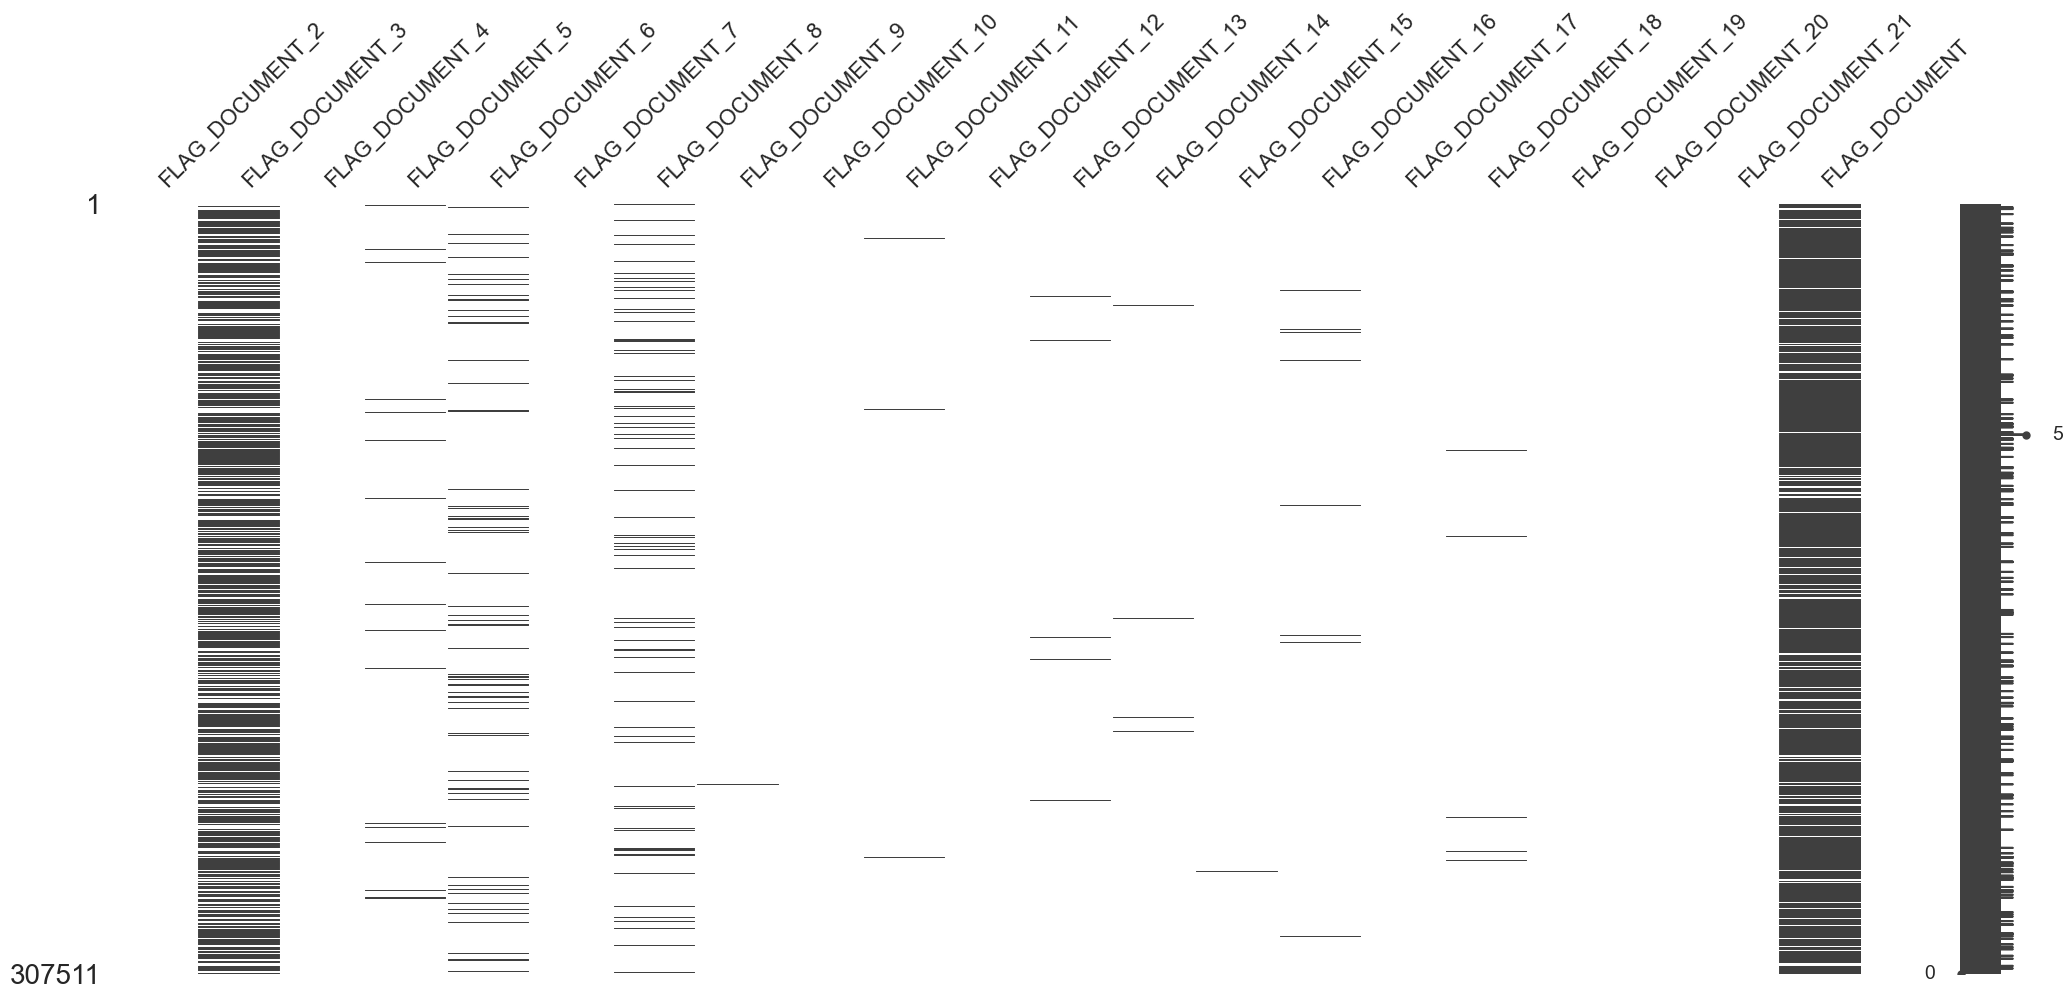

In [19]:
msno.matrix(visual_flag_doc)
plt.show()

In [20]:
application_train[application_train['FLAG_DOCUMENT'] == 0][['FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']].value_counts()

FLAG_DOCUMENT_20  FLAG_DOCUMENT_21
0                 0                   29549
Name: count, dtype: int64

In [21]:
application_train['LIVE_CITY_NOT_WORK_CITY'].value_counts()

LIVE_CITY_NOT_WORK_CITY
0    252296
1     55215
Name: count, dtype: int64

# AMT_

In [22]:
amt = application_train.filter(like='AMT_', axis=1)
amt.isnull().sum()

AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [23]:
#help_visuals.distribution_check(amt)

# Derivative normalized features
## APARTMENTS_

In [24]:
apartment_features = application_train[['APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE']]

# Check for identical features
apartment_features.loc[:, (apartment_features == apartment_features.iloc[0]).all()].columns

Index([], dtype='object')

In [25]:
apartment_features.isnull().sum()

APARTMENTS_AVG     156061
APARTMENTS_MEDI    156061
APARTMENTS_MODE    156061
dtype: int64

Features are derived from the same source and have identical missing value locations.

In [26]:
apartment_features[apartment_features['APARTMENTS_AVG'].isna() & ~apartment_features['APARTMENTS_MEDI'].isna()].shape

(0, 3)

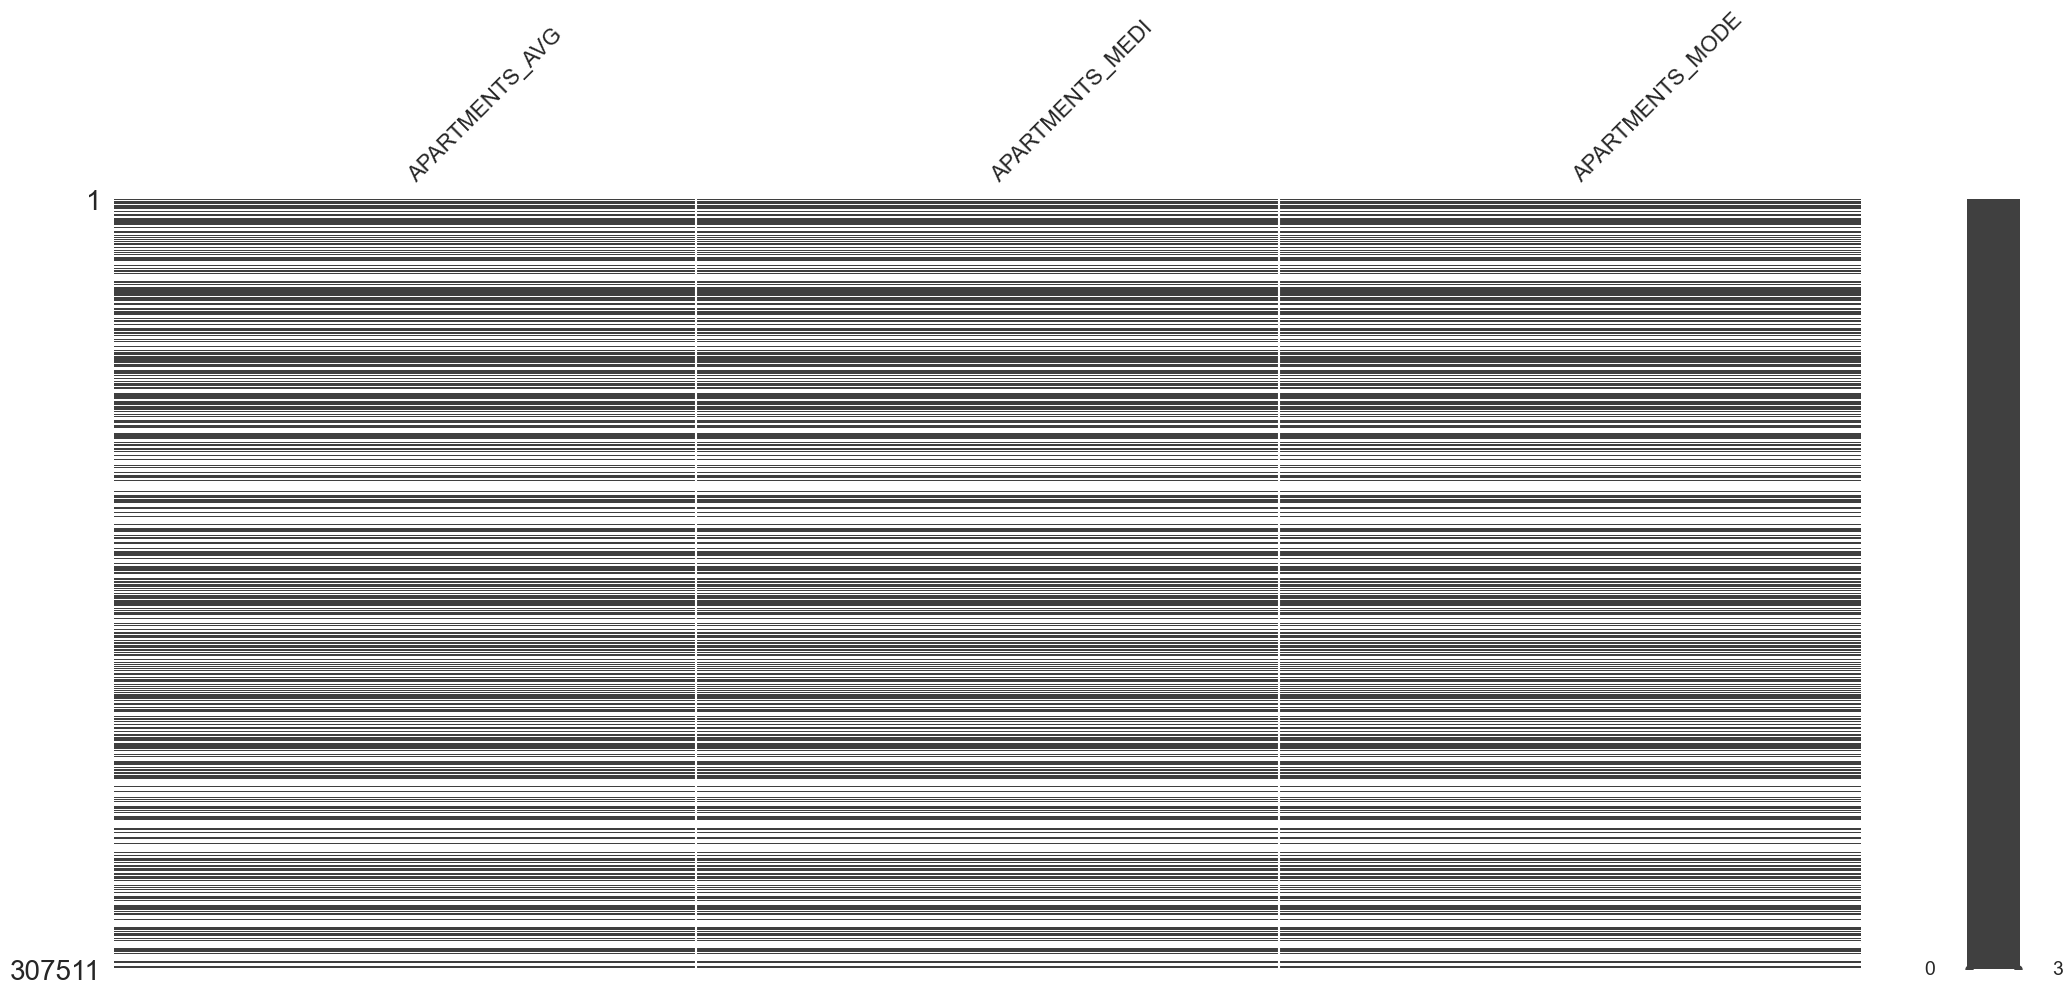

In [27]:
msno.matrix(apartment_features)
plt.show()

All of APARTMENTS_ features are highly correlated.

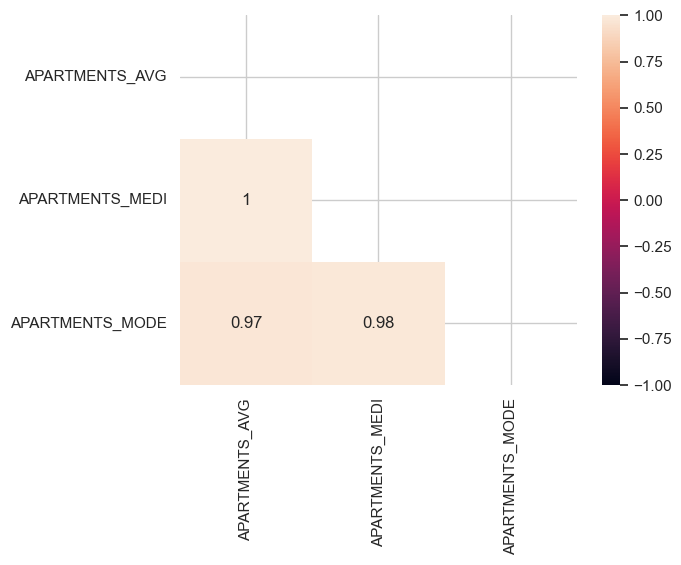

In [28]:
corr = apartment_features.corr()

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, mask=np.triu(corr))
plt.show()

Distribution of Data:
* Normal Distribution: If the normalized apartment sizes follow a roughly normal (Gaussian) distribution, the average is a suitable measure of central tendency. The average is sensitive to all values and provides a good overall representation when the data is symmetrically distributed.
* Skewed Distribution: If the normalized apartment sizes are skewed (either positively or negatively), the median is often more appropriate. The median is less affected by outliers and skewed data, giving a better sense of the typical apartment size in such cases.

Presence of Outliers:
* Average: Highly sensitive to outliers. If there are extreme values, the average can be distorted, potentially giving a misleading sense of the central tendency.
* Median: Robust to outliers. It remains representative of the central location of the data even in the presence of extreme values.

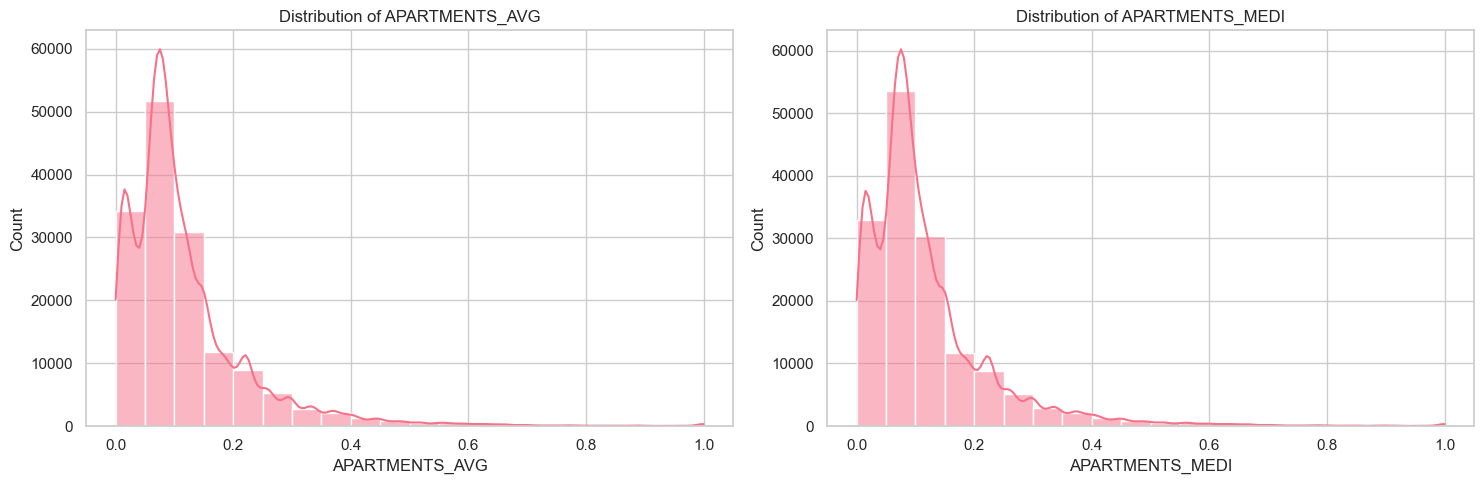

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot for 'APARTMENTS_AVG'
sns.histplot(data=application_train, x='APARTMENTS_AVG', kde=True, bins=20, ax=axes[0])
axes[0].set_title('Distribution of APARTMENTS_AVG')

# Plot for 'APARTMENTS_MEDI'
sns.histplot(data=application_train, x='APARTMENTS_MEDI', kde=True, bins=20, ax=axes[1])
axes[1].set_title('Distribution of APARTMENTS_MEDI')

plt.tight_layout()
plt.show()

In [30]:
application_train.drop(columns=['APARTMENTS_AVG', 'APARTMENTS_MODE'], inplace=True)

## Area deivatives
Rest of area derivative are skewed. Mean feature will be used, Average and Mode will be removed.

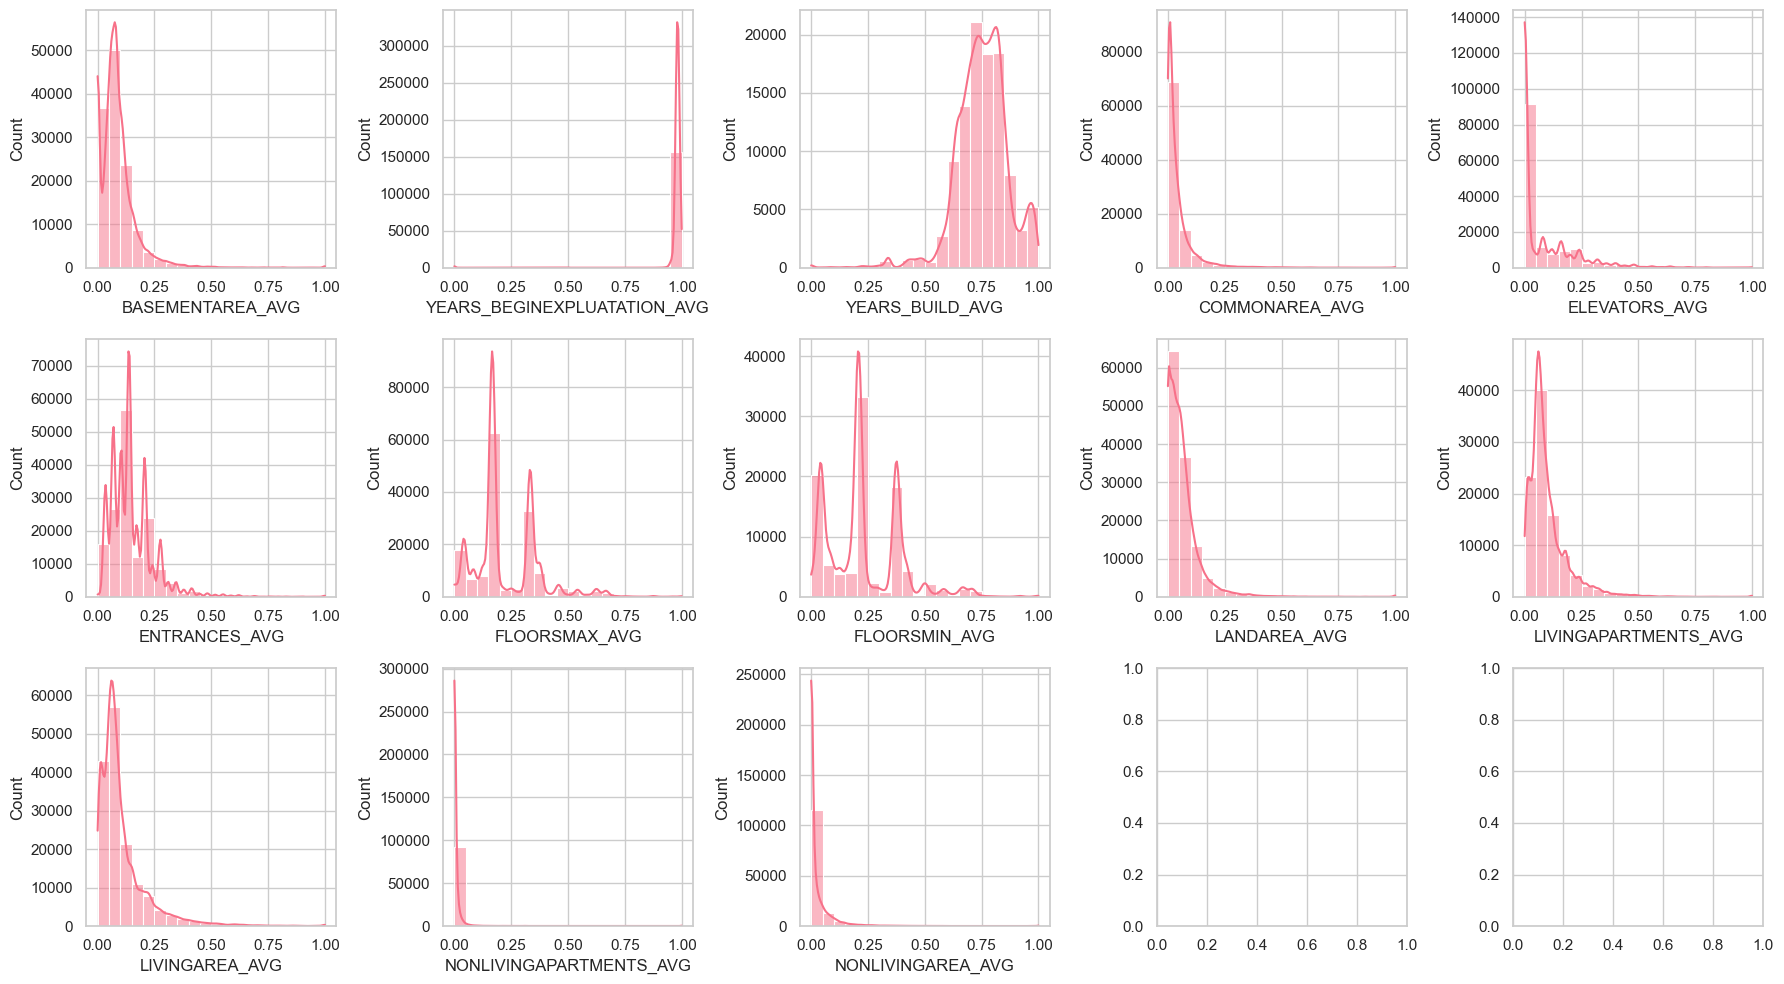

In [31]:
fig, axes = plt.subplots(3, 5, figsize=(18, 10))

features = application_train.filter(like='_AVG', axis=1).columns.to_list()

for i, feature in enumerate(features):
    row = i // 5  
    col = i % 5 
    
    sns.histplot(data=application_train, x=feature, kde=True, bins=20, ax=axes[row, col])

plt.tight_layout()
plt.show()

YEARS_BEGINEXPLUATATION_AVG


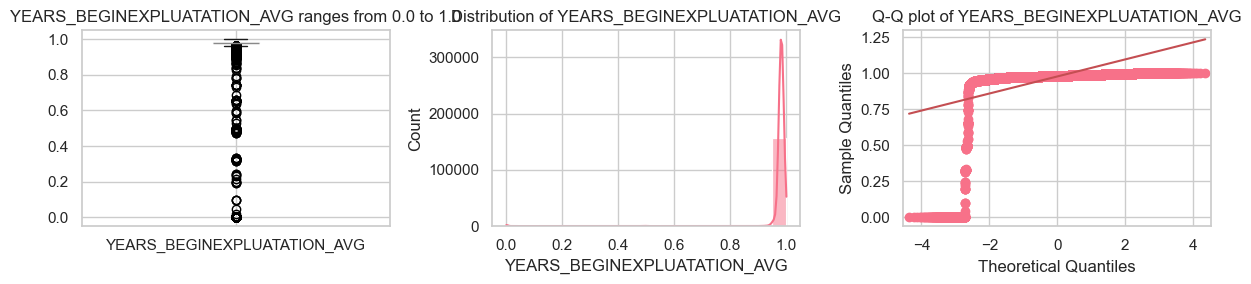

NONLIVINGAPARTMENTS_AVG


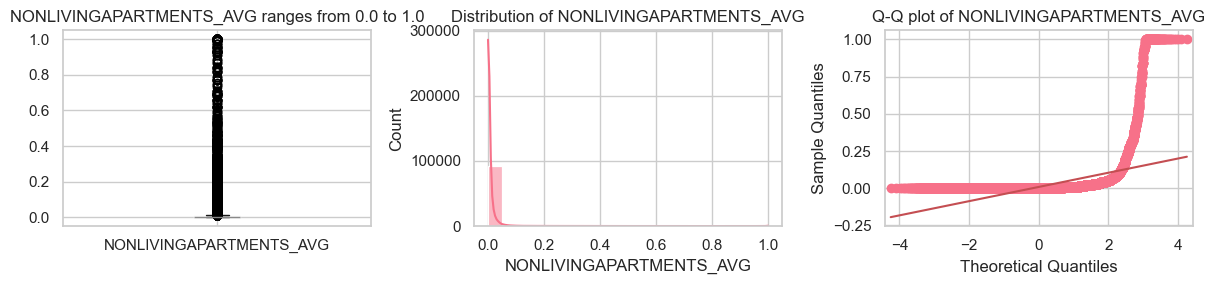

In [32]:
help_visuals.distribution_check(application_train[['YEARS_BEGINEXPLUATATION_AVG', 'NONLIVINGAPARTMENTS_AVG']])

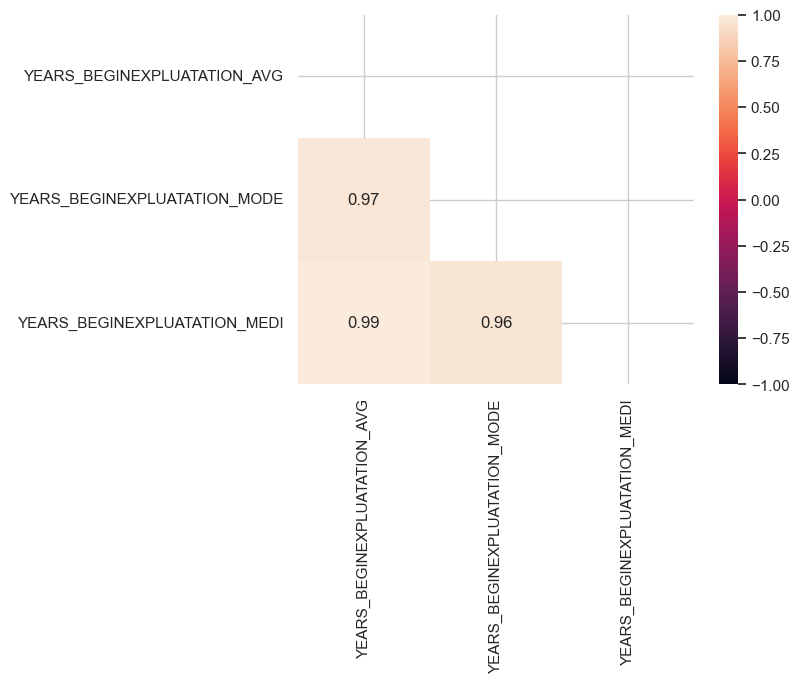

In [33]:
help_visuals.derivative_feature_corr(application_train, 'YEARS_BEGINEXPLUATATION_')

Remove AVG and MODE features, when coresponding MEDI is available

In [34]:
application_train.drop(columns=application_train.filter(like='_AVG').columns.str.replace('AVG', 'MODE').to_list(), inplace=True)

In [35]:
application_train.drop(columns=application_train.filter(like='_AVG').columns, inplace=True)

## Mode

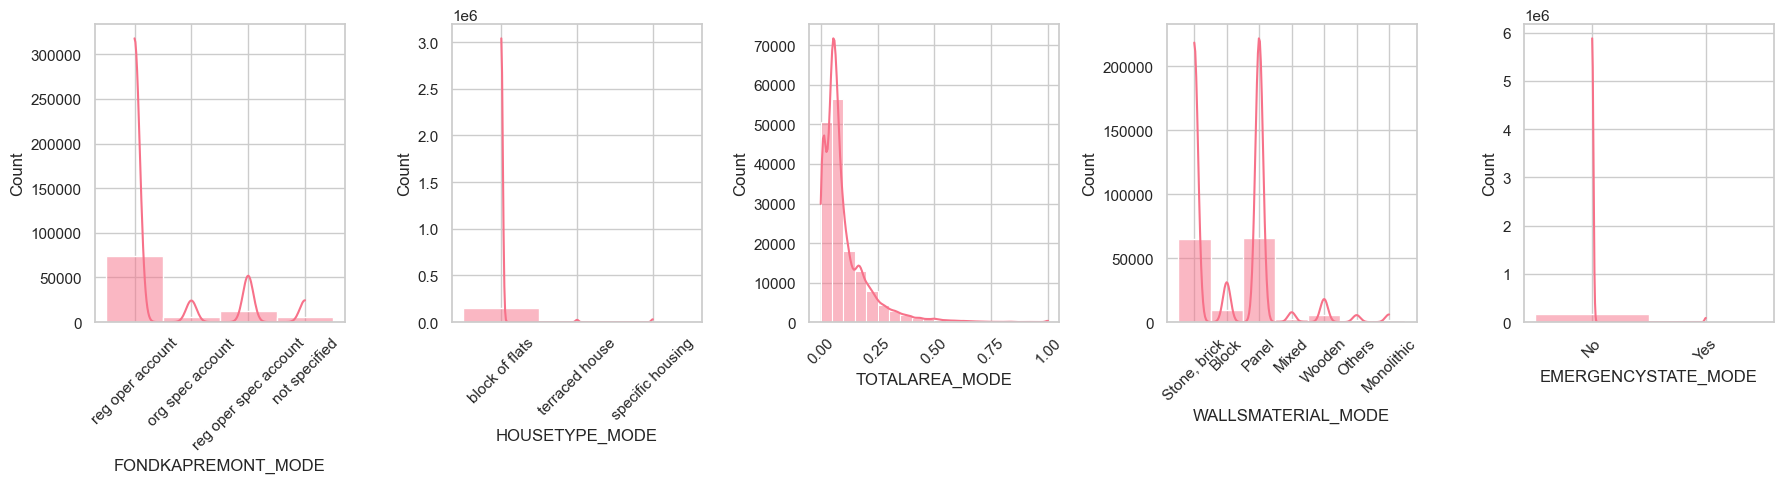

In [36]:
fig, axes = plt.subplots(1, 5, figsize=(18, 5))

features = application_train.filter(like='_MODE', axis=1).columns.to_list()

for i, feature in enumerate(features):
    sns.histplot(data=application_train, x=feature, kde=True, bins=20, ax=axes[i])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [37]:
application_train['EMERGENCYSTATE_MODE'] = application_train['EMERGENCYSTATE_MODE'].replace({'Yes': 1, 'No': 0}).astype(float)

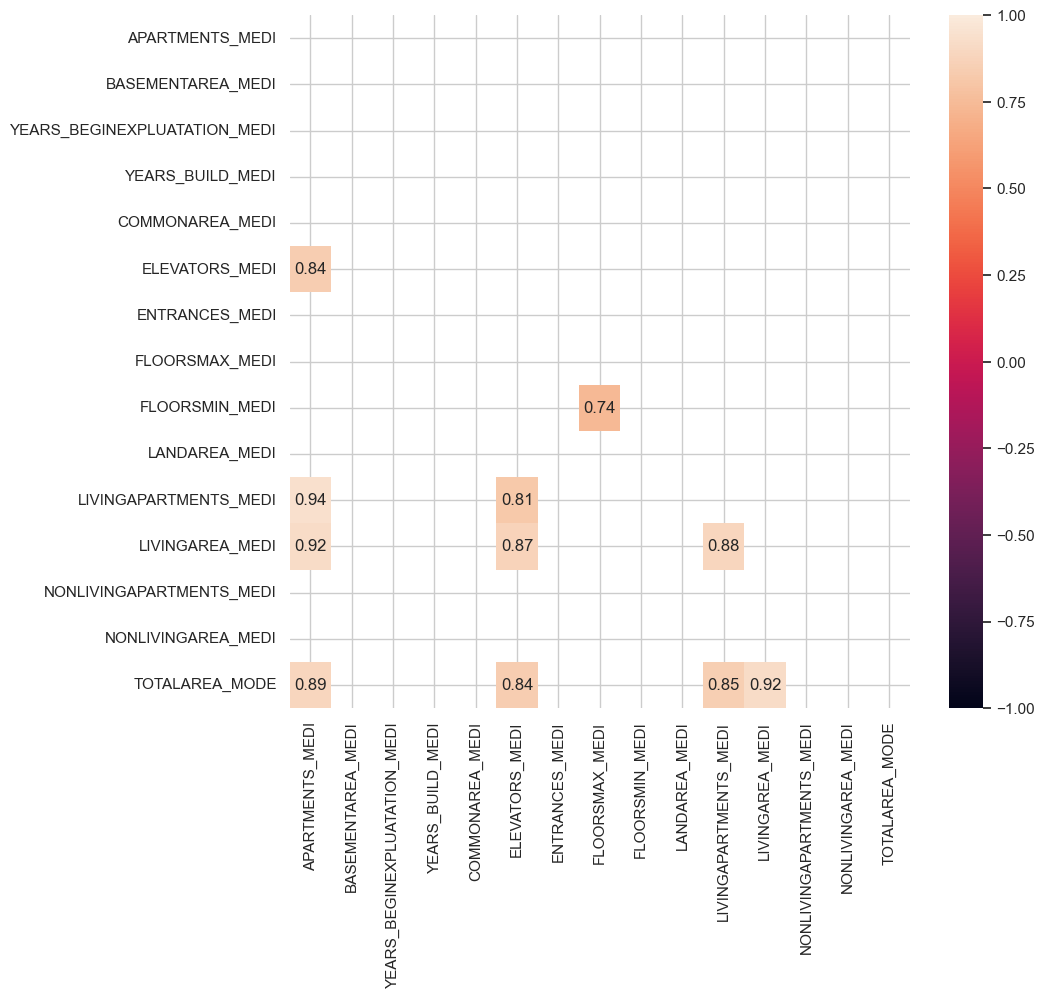

In [38]:
plt.figure(figsize=(10, 9))

corr = application_train[application_train.filter(like='MEDI', axis=1).columns.to_list() + ['TOTALAREA_MODE']].corr()

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, mask=~(np.tril(corr) & (corr.abs() > 0.7)  & (corr.abs() < 1)))
plt.show()

ELEVATORS_MEDI has different density distribution than the rest, but LIVINGAPARTMENTS_MEDI, LIVINGAREA_MEDI, TOTALAREA_MODE have similar shapes, TOTALAREA_MODE will be left from the 3.

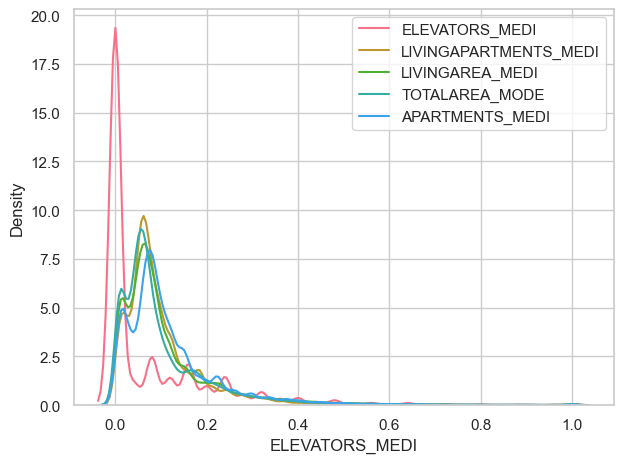

In [39]:
for feature in ["ELEVATORS_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "TOTALAREA_MODE", "APARTMENTS_MEDI"]:
    sns.kdeplot(data=application_train, x=feature, label=feature)

plt.tight_layout()
plt.legend()
plt.show()

In [40]:
application_train.drop(columns=["LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI", "APARTMENTS_MEDI"], inplace=True)

In [41]:
application_train.shape

(307511, 92)

# AMT_REQ_CREDIT_BUREAU

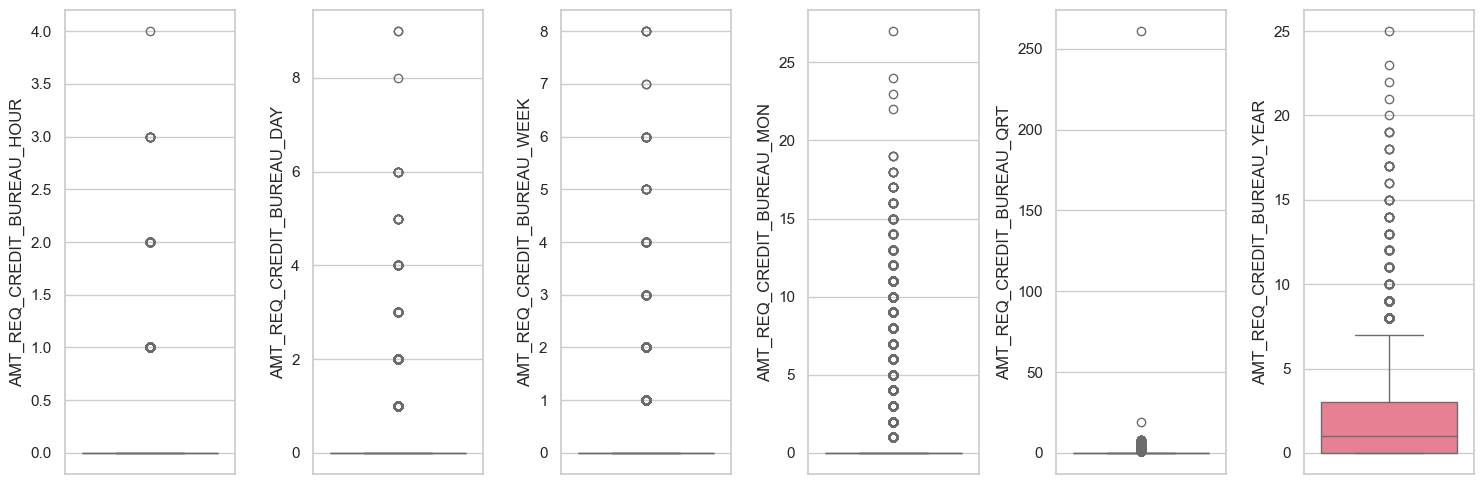

In [42]:
fig, axes = plt.subplots(1, 6, figsize=(15, 5))

# Iterate over features
for i, feature in enumerate(application_train.filter(like='AMT_REQ_CREDIT_BUREAU_', axis=1).columns):
    sns.boxplot(data=application_train, y=feature, ax=axes[i])

plt.tight_layout()
plt.show()

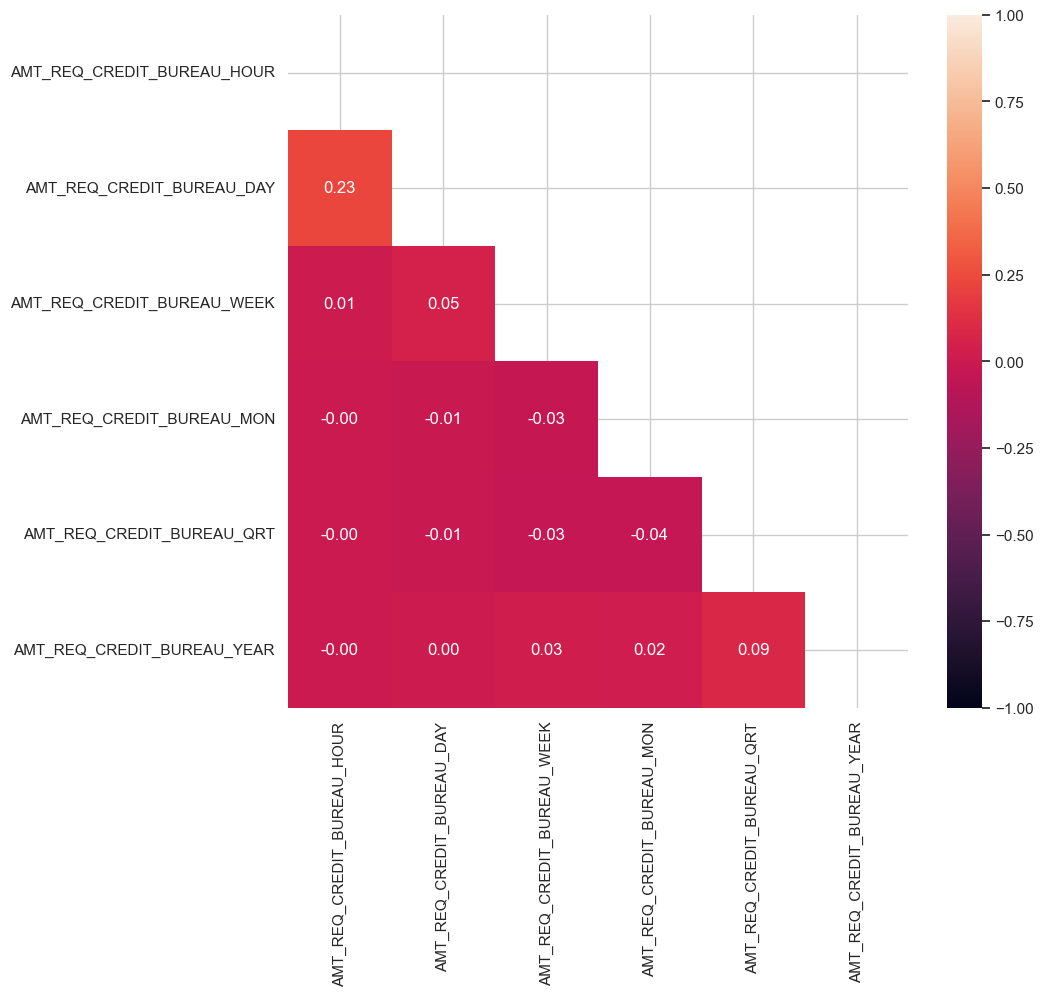

In [43]:
plt.figure(figsize=(10, 9))

corr = application_train[application_train.filter(like='AMT_REQ_CREDIT_BUREAU_', axis=1).columns.to_list()].corr(method='spearman')

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, mask=~(np.tril(corr) #& (corr.abs() > 0.7)  
                                                      & (corr.abs() < 1)
                                                      ), fmt='.2f'
                                                      )
plt.show()

In [44]:
application_train[application_train.filter(like='AMT_REQ_CREDIT_BUREAU_', axis=1).columns].isna().sum()

AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

In [45]:
application_train[[
    'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT'
    ]] = application_train[[
    'AMT_REQ_CREDIT_BUREAU_HOUR', 
    'AMT_REQ_CREDIT_BUREAU_DAY', 
    'AMT_REQ_CREDIT_BUREAU_WEEK', 
    'AMT_REQ_CREDIT_BUREAU_MON', 
    'AMT_REQ_CREDIT_BUREAU_QRT'
    ]].map(lambda x: 1 if x >= 1 else 0)

In [46]:
application_train.filter(like='AMT_REQ_CREDIT_BUREAU_', axis=1).var()

AMT_REQ_CREDIT_BUREAU_HOUR    0.005260
AMT_REQ_CREDIT_BUREAU_DAY     0.004819
AMT_REQ_CREDIT_BUREAU_WEEK    0.026988
AMT_REQ_CREDIT_BUREAU_MON     0.122052
AMT_REQ_CREDIT_BUREAU_QRT     0.137417
AMT_REQ_CREDIT_BUREAU_YEAR    3.494264
dtype: float64

In [47]:
application_train['AMT_REQ_CREDIT_BUREAU_YEAR'].quantile(0.99)

8.0

# _TYPE

In [48]:
application_train.filter(like='_TYPE', axis=1)

,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_CONTRACT_TYPE_CASH_LOANS
0,1,Working,2,House / apartment,Laborers,Business Entity Type 3,1.0
1,0,State servant,4,House / apartment,Core staff,School,1.0
2,1,Working,2,House / apartment,Laborers,Government,0.0
3,1,Working,2,House / apartment,Laborers,Business Entity Type 3,1.0
4,1,Working,2,House / apartment,Core staff,Religion,1.0
...,...,...,...,...,...,...,...
307506,1,Working,2,With parents,Sales staff,Services,1.0
307507,1,Pensioner,2,House / apartment,NaN,NaN,1.0
307508,1,Working,4,House / apartment,Managers,School,1.0
307509,1,Commercial associate,2,House / apartment,Laborers,Business Entity Type 1,1.0


# FLAG_DOCUMENT

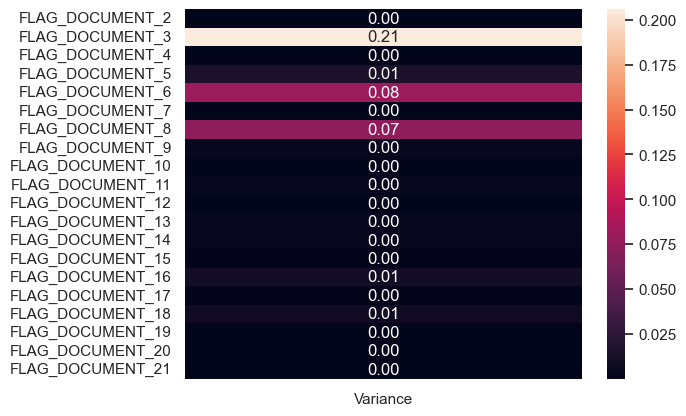

In [49]:
sns.heatmap(data=application_train.filter(like='FLAG_DOCUMENT_', axis=1).var().to_frame().rename(columns={0: 'Variance'}), annot=True, fmt='.2f')
plt.show()

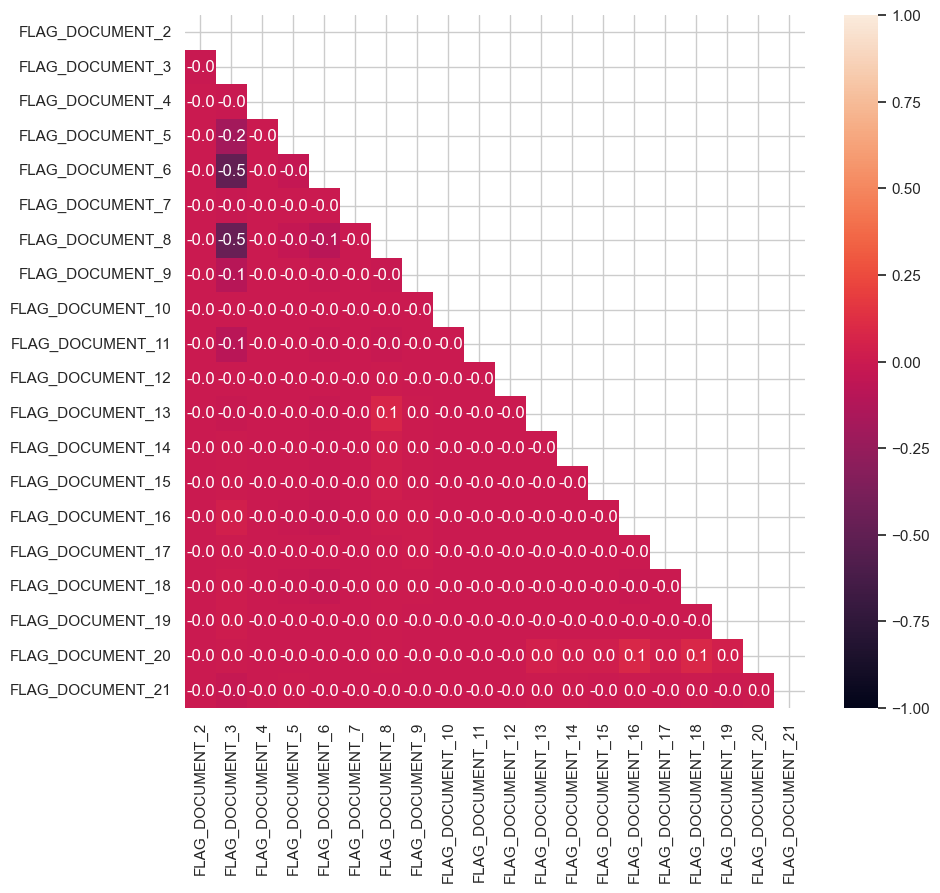

In [50]:
plt.figure(figsize=(10, 9))

corr = application_train[application_train.filter(like='FLAG_DOCUMENT_', axis=1).columns.to_list()].corr(method='spearman')

sns.heatmap(corr, annot=True, vmin=-1, vmax=1, mask=np.triu(corr), fmt='.1f')
plt.show()

In [51]:
application_train.filter(like='FLAG_DOCUMENT_', axis=1).columns.to_list()#.remove('FLAG_DOCUMENT_3')

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

# Light XGB

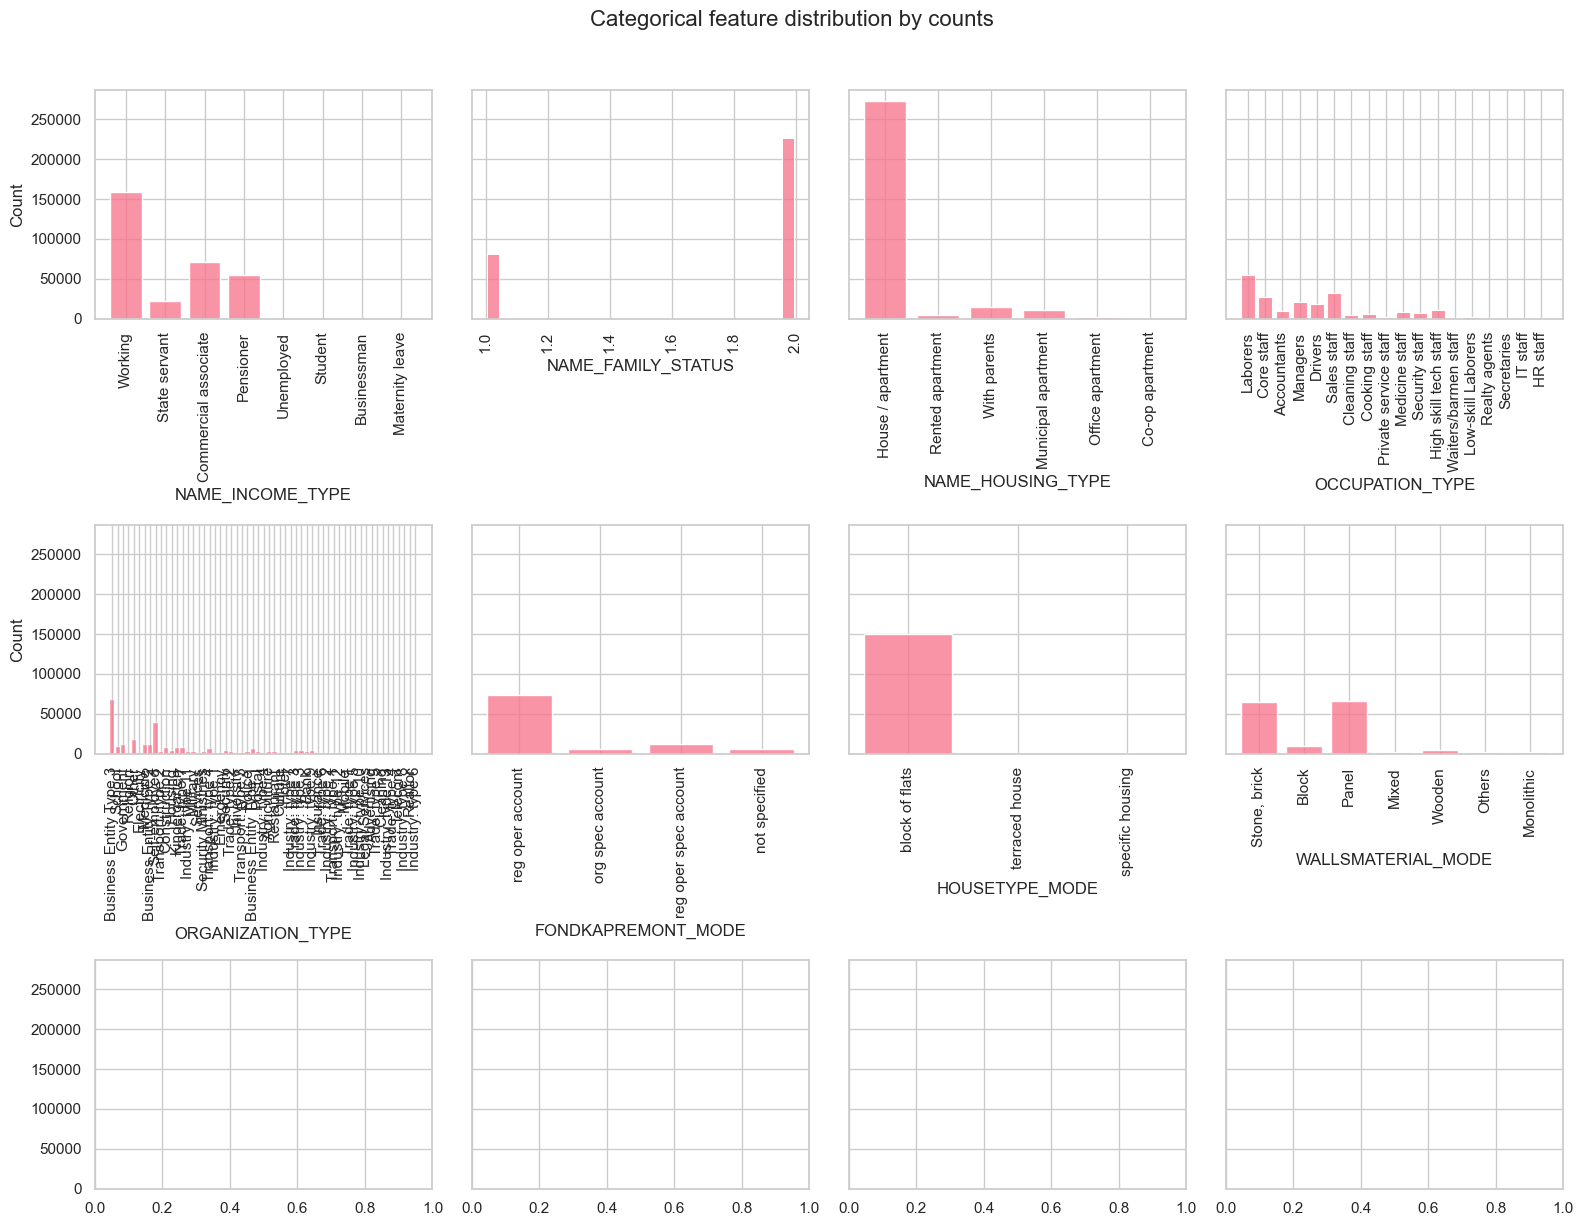

In [52]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12), sharey=True)

axes = axes.flatten()

for i, col in enumerate(application_train.select_dtypes(include=['object']).columns):
    sns.histplot(data=application_train, x=col, bins=20, multiple="dodge", shrink=.8,
                 ax=axes[i], #hue='Target', 
                 legend=True)
    axes[i].tick_params(axis='x', rotation=90)

plt.suptitle(f"Categorical feature distribution by counts", size=16, y=1.02)
plt.tight_layout()
plt.show()

In [53]:
application_train[['ORGANIZATION_TYPE', 'ORGANIZATION_TYPE_NR']] = (
    application_train['ORGANIZATION_TYPE']
    .str.replace('Type', 'type', regex=False)
    .str.replace(':', '', regex=False)
    .str.rsplit(" type ", n=1, expand=True)
)

# Replace any None with np.nan
application_train = application_train.replace([None], np.nan)

In [54]:
application_train[['ORGANIZATION_TYPE']].value_counts()
#.replace('None', np.nan)

ORGANIZATION_TYPE  
Business Entity        84529
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion               

In [55]:
object_columns = application_train.select_dtypes(include=['object']).columns.tolist()
application_train_w_dummies = help_tool.dummy_columns(application_train, object_columns)


application_train_w_dummies.columns = application_train_w_dummies.columns.str.replace(',', '_').str.replace(' ', '_')

In [56]:
y = application_train_w_dummies['TARGET']
X = application_train_w_dummies.drop(columns=['TARGET'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set the parameters for the LightGBM model
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'verbose': 0
}

# Train the model
lgb_model = LGBMClassifier(**params, n_estimators=100)
lgb_model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

# Get feature importances
importance = lgb_model.feature_importances_
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': importance
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='importance', ascending=False)

# Display the top 10 most important features
print("Top 10 most important features:")
print(feature_importance.head(10))


Top 10 most important features:
            feature  importance
32     EXT_SOURCE_1         358
34     EXT_SOURCE_3         277
33     EXT_SOURCE_2         261
79      YEARS_BIRTH         216
5        AMT_CREDIT         203
7   AMT_GOODS_PRICE         165
6       AMT_ANNUITY         154
13  DAYS_ID_PUBLISH         123
11    DAYS_EMPLOYED         112
14      OWN_CAR_AGE         110


Gender is 12th place in feature importance. Credit models are not allowed to discriminate against gender.

In [57]:
feature_importance.head(20).reset_index()

,index,feature,importance
0,32,EXT_SOURCE_1,358
1,34,EXT_SOURCE_3,277
2,33,EXT_SOURCE_2,261
3,79,YEARS_BIRTH,216
4,5,AMT_CREDIT,203
5,7,AMT_GOODS_PRICE,165
6,6,AMT_ANNUITY,154
7,13,DAYS_ID_PUBLISH,123
8,11,DAYS_EMPLOYED,112
9,14,OWN_CAR_AGE,110


In [58]:
feature_importance[feature_importance['importance'] == 0]

,feature,importance
155,HOUSETYPE_MODE_block_of_flats,0
137,ORGANIZATION_TYPE_Police,0
144,ORGANIZATION_TYPE_Security_Ministries,0
143,ORGANIZATION_TYPE_Security,0
170,ORGANIZATION_TYPE_NR_2,0
...,...,...
20,FLAG_EMAIL,0
101,OCCUPATION_TYPE_Cooking_staff,0
96,NAME_HOUSING_TYPE_Office_apartment,0
93,NAME_HOUSING_TYPE_Co-op_apartment,0


In [59]:
application_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']]

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
0,0.083037,0.262949,0.139376
1,0.311267,0.622246,NaN
2,NaN,0.555912,0.729567
3,NaN,0.650442,NaN
4,NaN,0.322738,NaN
...,...,...,...
307506,0.145570,0.681632,NaN
307507,NaN,0.115992,NaN
307508,0.744026,0.535722,0.218859
307509,NaN,0.514163,0.661024


# Variance

In [60]:
variance = application_train_w_dummies.var()
low_var_features = variance[variance < 0.001].index.to_list()
low_var_features

['REGION_POPULATION_RELATIVE',
 'FLAG_MOBIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Maternity_leave',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Legal_Services',
 'ORGANIZATION_TYPE_Religion',
 'ORGANIZATION_TYPE_NR_10',
 'ORGANIZATION_TYPE_NR_13',
 'ORGANIZATION_TYPE_NR_8']

No instances are missing for FLAG_DOCUMENT

In [61]:
filtered_columns = application_train.filter(like='FLAG_DOCUMENT', axis=1)
filtered_columns.columns[filtered_columns.isna().any()]

Index([], dtype='object')

But for visualization sake, let's create a new dataframe, and replace 0s with NaN. This way, MSNO can be used to visualize client providing document.

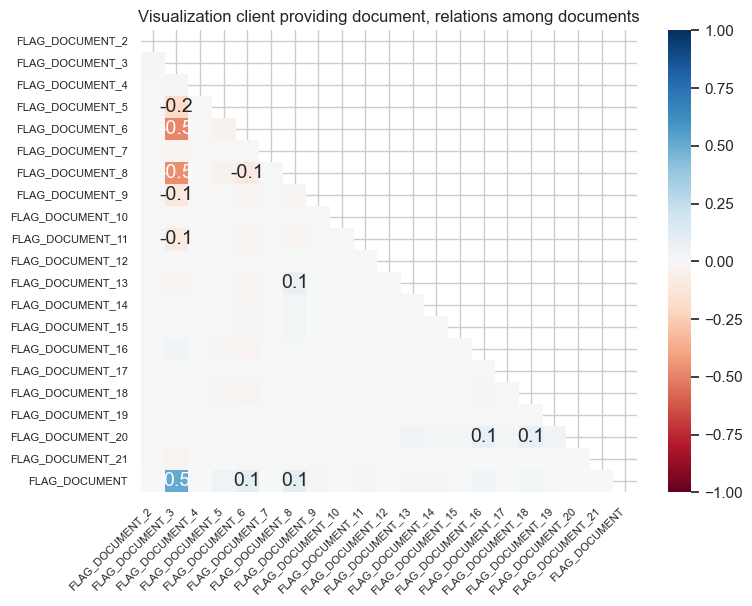

In [62]:
visual_ones = application_train_w_dummies.filter(like='FLAG_DOCUMENT', axis=1).replace(0, np.nan)

msno.heatmap(visual_ones, figsize=(8, 6))
plt.title("Visualization client providing document, relations among documents")

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [63]:
application_train_w_dummies.drop(columns=['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21'], inplace=True)

In [64]:
application_train.drop(columns=['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21'], inplace=True)

In [65]:
application_train.shape

(307511, 84)

In [66]:
application_train_w_dummies.shape

(307511, 170)

In [67]:
application_train['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

In [68]:
application_train['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
2    218391
4     74863
3     10277
1      3816
5       164
Name: count, dtype: int64

In [69]:
feature_importance.head(30)

,feature,importance
32,EXT_SOURCE_1,358
34,EXT_SOURCE_3,277
33,EXT_SOURCE_2,261
79,YEARS_BIRTH,216
5,AMT_CREDIT,203
7,AMT_GOODS_PRICE,165
6,AMT_ANNUITY,154
13,DAYS_ID_PUBLISH,123
11,DAYS_EMPLOYED,112
14,OWN_CAR_AGE,110


# From the top

In [70]:
application_train.head()

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,CODE_GENDER_F,NAME_CONTRACT_TYPE_CASH_LOANS,FLAG_DOCUMENT,ORGANIZATION_TYPE_NR
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1,...,0,0,0,0,1.0,25.9,0.0,1.0,1,3
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,0,...,0,0,0,0,0.0,45.9,1.0,1.0,1,NaN
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1,...,0,0,0,0,0.0,52.2,0.0,0.0,0,NaN
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1,...,0,0,0,0,NaN,52.1,1.0,1.0,1,3
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1,...,0,0,0,0,0.0,54.6,0.0,1.0,1,NaN


In [71]:
application_train.columns

Index(['SK_ID_CURR', 'TARGET', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEA

In [72]:
application_train.filter(like='_MODE', axis=1)

,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,reg oper account,block of flats,0.0149,"Stone, brick",0.0
1,reg oper account,block of flats,0.0714,Block,0.0
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
307506,reg oper account,block of flats,0.2898,"Stone, brick",0.0
307507,reg oper account,block of flats,0.0214,"Stone, brick",0.0
307508,reg oper account,block of flats,0.7970,Panel,0.0
307509,NaN,block of flats,0.0086,"Stone, brick",0.0


In [73]:
application_train['FONDKAPREMONT_MODE'].value_counts()

FONDKAPREMONT_MODE
reg oper account         73830
reg oper spec account    12080
not specified             5687
org spec account          5619
Name: count, dtype: int64

In [74]:
application_train[application_train['FONDKAPREMONT_MODE'] == 'not specified']

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,CODE_GENDER_F,NAME_CONTRACT_TYPE_CASH_LOANS,FLAG_DOCUMENT,ORGANIZATION_TYPE_NR
202,100235,0,0,1,0,135000.0,364896.0,19926.0,315000.0,1,...,0,0,0,0,2.0,43.5,1.0,1.0,1,NaN
241,100281,0,0,1,1,112500.0,675000.0,21906.0,675000.0,1,...,0,0,1,0,1.0,49.2,1.0,1.0,1,NaN
264,100304,0,0,1,0,225000.0,675000.0,33750.0,675000.0,1,...,0,0,0,0,0.0,62.4,1.0,0.0,0,3
276,100319,0,0,1,1,135000.0,781920.0,32868.0,675000.0,1,...,0,0,0,0,1.0,31.9,1.0,1.0,1,3
437,100504,0,0,1,0,157500.0,187704.0,12672.0,148500.0,1,...,0,0,1,0,1.0,50.1,1.0,1.0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307254,455971,0,0,1,0,274500.0,746280.0,54436.5,675000.0,1,...,0,0,1,0,3.0,52.7,0.0,1.0,1,NaN
307277,455994,0,1,1,0,270000.0,536917.5,32976.0,463500.0,1,...,0,0,0,1,2.0,47.6,0.0,1.0,1,NaN
307438,456176,1,0,1,0,171000.0,1436850.0,42142.5,1125000.0,1,...,0,0,0,1,2.0,30.9,0.0,1.0,1,NaN
307476,456216,0,0,0,2,135000.0,1762110.0,48456.0,1575000.0,1,...,0,0,0,0,1.0,37.8,1.0,1.0,1,NaN


<Axes: xlabel='FLOORSMAX_MEDI', ylabel='Count'>

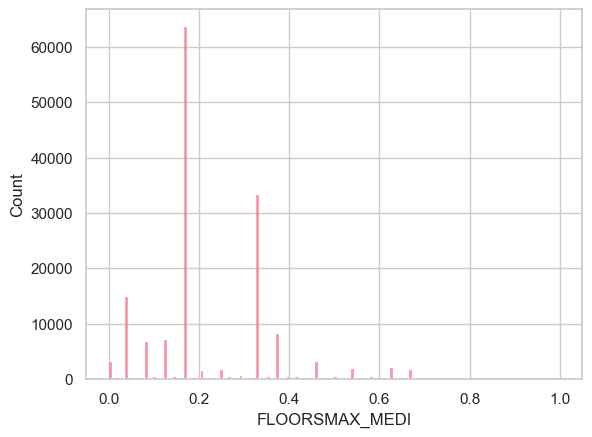

In [75]:
sns.histplot(application_train['FLOORSMAX_MEDI'])

<Axes: xlabel='FLOORSMIN_MEDI', ylabel='Count'>

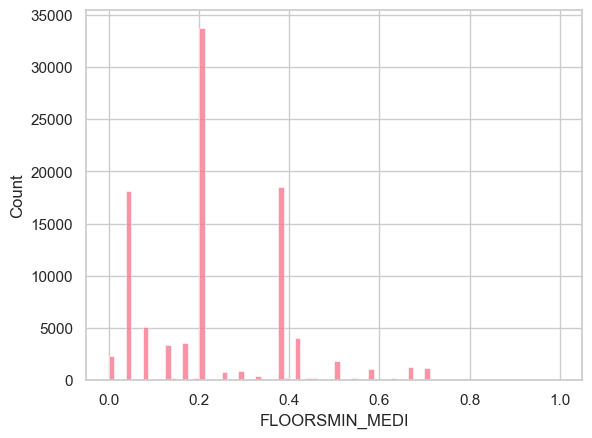

In [76]:
sns.histplot(application_train['FLOORSMIN_MEDI'])

In [77]:
application_train[['FLOORSMIN_MEDI', 'FLOORSMAX_MEDI']]

,FLOORSMIN_MEDI,FLOORSMAX_MEDI
0,0.1250,0.0833
1,0.3333,0.2917
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
307506,0.2708,0.6042
307507,0.1250,0.0833
307508,0.2083,0.1667
307509,NaN,0.0417


In [78]:
application_train[['OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'ORGANIZATION_TYPE_NR']]


,OCCUPATION_TYPE,ORGANIZATION_TYPE,ORGANIZATION_TYPE_NR
0,Laborers,Business Entity,3
1,Core staff,School,NaN
2,Laborers,Government,NaN
3,Laborers,Business Entity,3
4,Core staff,Religion,NaN
...,...,...,...
307506,Sales staff,Services,NaN
307507,NaN,NaN,NaN
307508,Managers,School,NaN
307509,Laborers,Business Entity,1


In [79]:
application_train['ORGANIZATION_TYPE'].value_counts()

ORGANIZATION_TYPE
Business Entity        84529
Self-employed          38412
Other                  16683
Trade                  14315
Industry               14311
Medicine               11193
Government             10404
Transport               8990
School                  8893
Kindergarten            6880
Construction            6721
Security                3247
Housing                 2958
Military                2634
Bank                    2507
Agriculture             2454
Police                  2341
Postal                  2157
Security Ministries     1974
Restaurant              1811
Services                1575
University              1327
Hotel                    966
Electricity              950
Insurance                597
Telecom                  577
Emergency                560
Advertising              429
Realtor                  396
Culture                  379
Mobile                   317
Legal Services           305
Cleaning                 260
Religion                 

In [80]:
org_chart = application_train.groupby(['ORGANIZATION_TYPE', 'ORGANIZATION_TYPE_NR'])['YEARS_BIRTH'].mean().to_frame().reset_index()

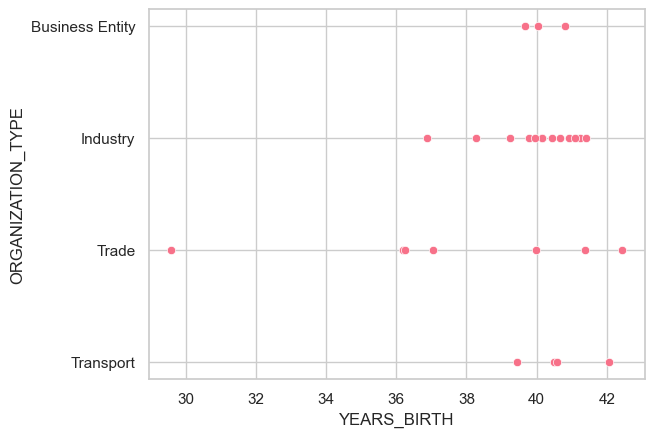

In [81]:
sns.scatterplot(data=org_chart, x='YEARS_BIRTH', y='ORGANIZATION_TYPE'
                #, hue='ORGANIZATION_TYPE_NR'
                )
plt.show()